In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Reviews.csv')

# Data Exploration

In [3]:
display(df.head())
display(df.info())

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


None

In [4]:
print('% Of Null Values:')
((df.isna().sum() / len(df)) * 100).sort_values(ascending = False)

% Of Null Values:


Summary                   0.004750
ProfileName               0.004574
Id                        0.000000
ProductId                 0.000000
UserId                    0.000000
HelpfulnessNumerator      0.000000
HelpfulnessDenominator    0.000000
Score                     0.000000
Time                      0.000000
Text                      0.000000
dtype: float64

In [5]:
df = df.dropna()

In [6]:
df = df.set_index('Id')
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...
568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."


# Roberta model

In [7]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [8]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [9]:
#Example
example = df['Text'][88]
example

"My shepherd/collie mix has IBS.  Our vet recommended a limited ingredient food.  This has really helped her symptoms and she likes it.  I will always buy it from Amazon...it's $10 cheaper and free shipping!"

In [10]:
# run roberta
encoded_text = tokenizer(example, return_tensors = 'pt')
encoded_text

{'input_ids': tensor([[    0,  2387, 35234,    73, 27454,   324,  3344,    34,    38,  3297,
             4,  1437,  1541,  9087,  5131,    10,  1804, 16181,   689,     4,
          1437,   152,    34,   269,  1147,    69,  5298,     8,    79,  3829,
            24,     4,  1437,    38,    40,   460,   907,    24,    31,  1645,
           734,   405,    18,    68,   698,  7246,     8,   481,  6738,   328,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1]])}

this is the encoded text **'My shepherd/collie mix has IBS.  Our vet recommended a limited ingredient food.  This has really helped her symptoms and she likes it, I will always buy it from Amazon...it's \$ 10 cheaper and free shipping!.'**

In [11]:
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-2.2452, -0.1805,  2.9806]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [12]:
# change from Tensor into numpy
scores = output[0][0].detach().numpy() 
scores = softmax(scores)
print(f'negative: {scores[0]}, neutral: {scores[1]}, positive: {scores[2]}')

negative: 0.0051310062408447266, neutral: 0.04044672101736069, positive: 0.9544222354888916


**Perfect, message is clearly negative, and model works really well**

In [13]:
# dictionary:

scores_dict = {'Roberta_negative':scores[0],
              'Poberts_Neutral' : scores[1],
              'Roberta_positive' : scores[2]}
scores_dict

{'Roberta_negative': 0.0051310062,
 'Poberts_Neutral': 0.04044672,
 'Roberta_positive': 0.95442224}

In [14]:
# function
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {'Roberta_negative':scores[0],
                  'Poberts_Neutral' : scores[1],
                  'Roberta_positive' : scores[2]}
    return scores_dict

In [15]:
# sample df (500)
sample_df = df.sample(n=500, random_state=42)

In [16]:
from tqdm import tqdm

results = {}
for i, row in tqdm(sample_df.iterrows(), total=len(sample_df)):
    text = row['Text']
    myid = row.name
    try:
        roberta_results = polarity_scores_roberta(text)
    except RuntimeError:
        roberta_results = np.nan  
    results[myid] = roberta_results


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [03:20<00:00,  2.50it/s]


In [17]:
results_df = pd.DataFrame(results).T
results_df

,Roberta_negative,Poberts_Neutral,Roberta_positive
18829,0.268283,0.501147,0.230570
363858,0.008045,0.065772,0.926184
342610,0.693650,0.234588,0.071762
62214,0.010261,0.115614,0.874125
467134,0.003712,0.020463,0.975826
...,...,...,...
278080,0.001725,0.005843,0.992432
250618,0.002456,0.019105,0.978439
555343,0.100225,0.289164,0.610611
533561,0.349866,0.345602,0.304532


In [18]:
results_df.isna().sum()

Roberta_negative    6
Poberts_Neutral     6
Roberta_positive    6
dtype: int64

**6 messages were longer than allowed by the model**

In [19]:
results_df = results_df.dropna()
results_df

,Roberta_negative,Poberts_Neutral,Roberta_positive
18829,0.268283,0.501147,0.230570
363858,0.008045,0.065772,0.926184
342610,0.693650,0.234588,0.071762
62214,0.010261,0.115614,0.874125
467134,0.003712,0.020463,0.975826
...,...,...,...
322439,0.001565,0.009664,0.988771
278080,0.001725,0.005843,0.992432
250618,0.002456,0.019105,0.978439
555343,0.100225,0.289164,0.610611


In [20]:
final_df = df.merge(results_df, left_index=True, right_index=True) 
final_df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Roberta_negative,Poberts_Neutral,Roberta_positive
1272,B007237380,AO41UUXDH3CO,David E. Lajoie,0,0,5,1332374400,Absolutely the Best,Have bought this from the folks who prepare it...,0.001729,0.011263,0.987008
1534,B00116629A,A3FAQACBPKDOWC,"J. Lehrer ""JL""",2,2,4,1234742400,Good but way too expensive,"Good product and decent shipping. However, the...",0.568263,0.315269,0.116468
1722,B001RVFDOO,A2BJFEALU6PLJA,Victoria Hopkins Walmsley,0,0,5,1281744000,Great tasting,The popchips are a nice alternative to potato ...,0.002050,0.022080,0.975870
3787,B001HTKO86,A193GWS6YB77TD,Emily H. Harris,1,1,5,1302393600,Great for chicken curry dishes,I have been using this curry paste for several...,0.002391,0.030560,0.967049
5102,B004157PZI,AXSQGK5IGCYI,Nadeem,0,0,5,1336608000,yummy,Great product and it tastes great. I keep a b...,0.002089,0.018059,0.979851
...,...,...,...,...,...,...,...,...,...,...,...,...
565045,B001L1ASN6,AVEKHFJ4WNAZB,Renee,0,1,4,1318464000,Great tasting cereal!,I purchased this cereal because I wanted to ge...,0.018765,0.056677,0.924558
565169,B001EO5U3I,AXO4PQU0XG3TG,Dwight,3,4,4,1168300800,$17.05 for satisfying and healthier rice subst...,I don't have any regrets purchasing this produ...,0.010327,0.065670,0.924003
565421,B001EO5U3I,A1Q8QT6GOH6SEX,Lakegirl,2,2,5,1311465600,"Delicious, healthy, easy to prepare, versatile","After many years of eating Quaker Oats, I purc...",0.001917,0.018665,0.979418
568322,B0013Z0PTW,A1GGOPQUNRFLAK,Scott Mackenzie,0,0,5,1215993600,nice taste,"Granted, this isn't as tasty as a Milky Way ca...",0.006191,0.036112,0.957696


# Combine & Compare

<Figure size 1000x800 with 0 Axes>

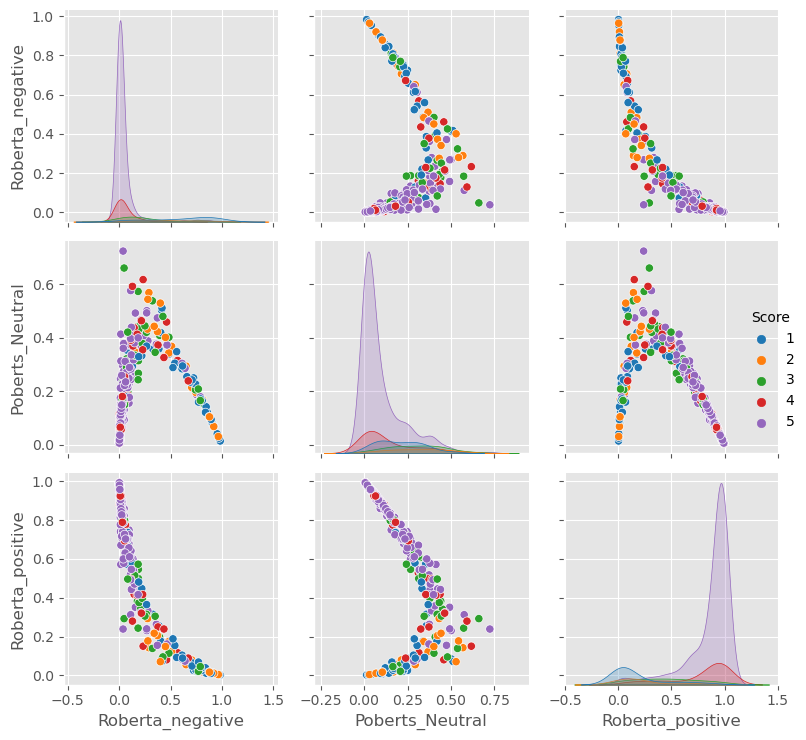

In [21]:
plt.figure(figsize = (10,8))
sns.pairplot(final_df[['Score', 'Roberta_negative','Poberts_Neutral','Roberta_positive']], 
             hue = 'Score',
            palette = 'tab10')

plt.tight_layout()
plt.show()